# Random Controlled Unitaries

In [1]:
import cirq
import numpy as np
from scipy.stats import unitary_group

# Define a random unitary matrix
random_unitary = unitary_group.rvs(2)

# Define the circuit with two qubits
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

# Apply a Hadamard gate to the control qubit
circuit.append(cirq.H(q0))

# Apply a controlled-unitary gate
circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(q0, q1))

# Apply a Hadamard gate to the control qubit again
circuit.append(cirq.H(q0))

# Display the circuit
print(circuit)

# Simulate the circuit for both control qubit states
simulator = cirq.Simulator()
result = simulator.simulate(circuit, qubit_order=[q0, q1])

print(f"Control qubit in |0> state:\n{result}")
print(f"Control qubit in |1> state:\n{simulator.simulate(circuit, initial_state=1, qubit_order=[q0, q1])}")


0: ───H───@───────────────────────────────H───
          │
          ┌                           ┐
1: ───────│ 0.297+0.229j -0.86 +0.345j│───────
          │-0.455+0.808j  0.189+0.324j│
          └                           ┘
Control qubit in |0> state:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: (0.648+0.115j)|00⟩ + (-0.227+0.404j)|01⟩ + (0.352-0.115j)|10⟩ + (0.227-0.404j)|11⟩

phase:
output vector: |⟩
Control qubit in |1> state:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: (-0.43+0.172j)|00⟩ + (0.594+0.162j)|01⟩ + (0.43-0.172j)|10⟩ + (0.406-0.162j)|11⟩

phase:
output vector: |⟩


We should be able to generalize random controlled unitaries to the case with a control qubit and a target qudit of dimension `n`. Random controlled unitaries allow for modelling more general forms of entanglement than just the standard `CNOT` (or its generalization the `CSHIFT`) gate, or the `CZ` (or its generalization the `CPHASE`) gate. More general forms of entanglement allow us to model perterbations and errors in surface codes and their generalizations. 

We can calculate distance between a random `CU` and the `CX` gate in the operator norm. Once we have a distance, we can construct edge weights in something like an interaction graph as the reciprocal of the distance. This means interactions are "stronger" when they are closer to a `CX` entangling gate. Note, we could also use `CZ` or some other controlled-gate as our reference. Using this, we can develop different models of entanglement and we may find that custom AI-designed CU gates that are built specifically for certain hardware backends are better for performing quantum computation. 

In [2]:
import cirq
import numpy as np
from scipy.stats import unitary_group

# Define a random unitary matrix
random_unitary = unitary_group.rvs(2)

# Define the circuit with two qubits
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

# Apply a Hadamard gate to the control qubit
circuit.append(cirq.H(q0))

# Apply a controlled-unitary gate
circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(q0, q1))

# Apply a Hadamard gate to the control qubit again
circuit.append(cirq.H(q0))

# Display the circuit
print(circuit)

# Calculate the matrix representation of the CNOT gate
cnot_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])

# Calculate the matrix representation of the random controlled unitary gate
cu_matrix = cirq.unitary(circuit)

# Calculate the difference matrix
diff_matrix = cu_matrix - cnot_matrix

# Calculate the operator norm of the difference matrix
distance = np.linalg.norm(diff_matrix, ord=2)

print(f"Distance between the random controlled unitary gate and the CNOT gate: {distance}")


0: ───H───@───────────────────────────────H───
          │
          ┌                           ┐
1: ───────│ 0.987+0.016j -0.128-0.091j│───────
          │-0.156-0.022j -0.726-0.67j │
          └                           ┘
Distance between the random controlled unitary gate and the CNOT gate: 1.9038557282437243


We now want to constuct an interaction graph with an edge weight corresponding to `1/distance`. 

In [3]:
import cirq
import numpy as np
from scipy.stats import unitary_group

# Define a random unitary matrix
random_unitary = unitary_group.rvs(2)

# Define the circuit with two qubits
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

# Apply a Hadamard gate to the control qubit
circuit.append(cirq.H(q0))

# Apply a controlled-unitary gate
circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(q0, q1))

# Apply a Hadamard gate to the control qubit again
circuit.append(cirq.H(q0))

# Calculate the matrix representation of the CNOT gate
cnot_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])

# Calculate the matrix representation of the random controlled unitary gate
cu_matrix = cirq.unitary(circuit)

# Calculate the distance between the random controlled unitary gate and the CNOT gate
distance = np.linalg.norm(cu_matrix - cnot_matrix, ord=2)

# Construct the adjacency matrix for the interaction graph
adjacency_matrix = np.zeros((2, 2))
if distance != 0:
    adjacency_matrix[0, 1] = 1 / distance
    adjacency_matrix[1, 0] = 1 / distance

print(f"Adjacency matrix for the interaction graph:\n{adjacency_matrix}")


Adjacency matrix for the interaction graph:
[[0.         0.51069633]
 [0.51069633 0.        ]]


Here's another example with the weighted interaction graph visualized. 

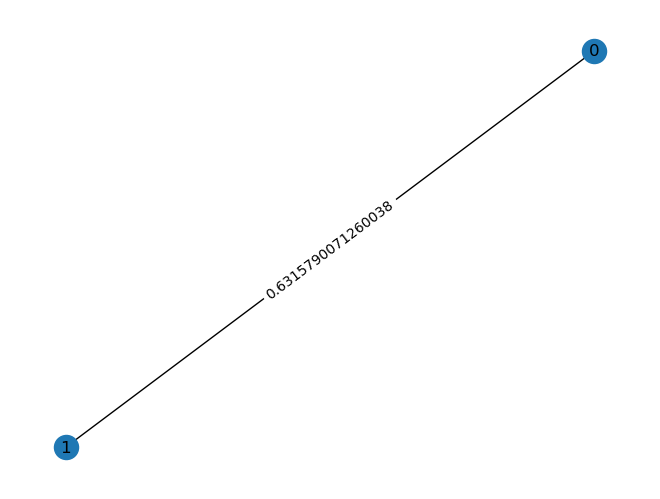

In [5]:
import cirq
import numpy as np
from scipy.stats import unitary_group
import networkx as nx
import matplotlib.pyplot as plt

# Define a random unitary matrix
random_unitary = unitary_group.rvs(2)

# Define the circuit with two qubits
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

# Apply a Hadamard gate to the control qubit
# circuit.append(cirq.H(q0))

# Apply a controlled-unitary gate
circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(q0, q1))

# Apply a Hadamard gate to the control qubit again
# circuit.append(cirq.H(q0))

# Calculate the matrix representation of the CNOT gate
cnot_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])

# Calculate the matrix representation of the random controlled unitary gate
cu_matrix = cirq.unitary(circuit)

# Calculate the distance between the random controlled unitary gate and the CNOT gate
distance = np.linalg.norm(cu_matrix - cnot_matrix, ord=2)

# Construct the adjacency matrix for the interaction graph
adjacency_matrix = np.zeros((2, 2))
if distance != 0:
    adjacency_matrix[0, 1] = 1 / distance
    adjacency_matrix[1, 0] = 1 / distance

# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([0, 1])

# Add edges
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if adjacency_matrix[i, j] != 0:
            G.add_edge(i, j, weight=adjacency_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
